In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [89]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [90]:
seq = 'ACGTGATCGATCGAT'

In [91]:
x = random.choice('ACGT')
x

'T'

In [92]:
rand_seq = ''.join([random.choice('ACGT') for _ in range(20)])
rand_seq

'ACTGCATTTCACGTGCACAG'

In [93]:
rand_seq[-3:]

'CAG'

In [94]:
def longest_common_prefix(s1,s2):
    i = 0
    while(i<len(s1) and i<len(s2) and s1[i]==s2[i]):
        i+=1
    return i

In [95]:
s1 = 'ACAGT'
s2 = 'ACATT'
longest_common_prefix(s1,s2)

3

In [122]:
def reverse_complement(s):
    compliment = {
    'A':'T',
    'T':'A',
    'C':'G',
    'G':'C',
    'N':'N'
    }
    res = []
    for i,item in enumerate(s):
        #blank for missing/non valid nucleotides
        res.append(compliment.get(item,''))
    res.reverse()
    return ''.join(res)

In [97]:
reverse_compliment(s1)

'ACTGT'

In [98]:
#reading from a fasta file
def read_genome(filename):
    genome = []
    with open(filename,'r') as f:
        for line in f:
            if line[0]!='>':
                genome.append(line.rstrip())
    return ''.join(genome)

In [99]:
lamda_genome = read_genome('lambda_virus.fa')

In [100]:
def frequency(genome):
    counts = {
        'A':0,
        'C':0,
        'G':0,
        'T':0
    }
    for base in genome:
        counts[base]+=1
    return counts

In [101]:
frequency(lamda_genome)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}

In [102]:
import collections
collections.Counter(genome)

Counter({'G': 1254, 'A': 1291, 'T': 1684, 'C': 1157})

In [103]:
def QtoPred33(Q):
    return chr(Q+33)

def phred33ToQ(qual):
    return ord(qual) - 33

In [104]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2020-06-23 18:27:33--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.33.151.172, 13.33.151.45, 13.33.151.164, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.33.151.172|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq.1’

SRR835775_1.first10 100%[===================>] 219.52K   252KB/s    in 0.9s    

2020-06-23 18:27:35 (252 KB/s) - ‘SRR835775_1.first1000.fastq.1’ saved [224786/224786]



In [105]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [106]:
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [107]:
def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

In [108]:
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


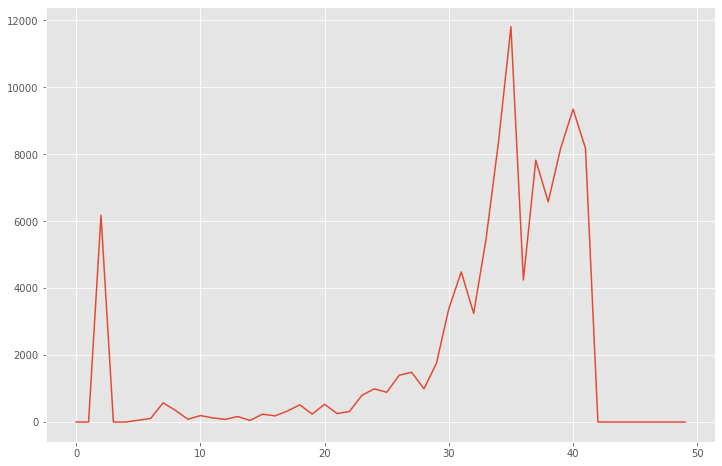

In [109]:
plt.plot(range(len(h)), h)
plt.show()

In [110]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * len(reads[0])
    totals = [0] * len(reads[0])
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

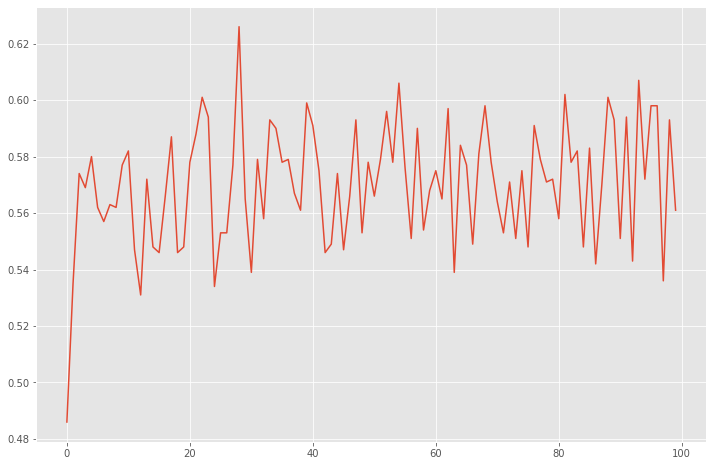

In [111]:
gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [112]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

In [113]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa

--2020-06-23 18:27:36--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.33.151.132, 13.33.151.164, 13.33.151.45, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.33.151.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa.1’

phix.fa.1           100%[===================>]   5.40K  --.-KB/s    in 0.004s  

2020-06-23 18:27:38 (1.43 MB/s) - ‘phix.fa.1’ saved [5528/5528]



In [124]:
genome = read_genome('phix.fa')

In [125]:
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [126]:
# Generate 80 reads of length 100
reads = generateReads(genome, 80, 100)

# Count how many reads match the genome exactly
numMatched = 0
for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, len(reads)))

80 / 80 reads matched the genome exactly!


In [117]:
#download the sequence reads of the current genome
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

--2020-06-23 18:27:38--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.33.151.132, 13.33.151.164, 13.33.151.45, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.33.151.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq.1’

ERR266411_1.first10 100%[===================>] 248.42K   371KB/s    in 0.7s    

2020-06-23 18:27:40 (371 KB/s) - ‘ERR266411_1.first1000.fastq.1’ saved [254384/254384]



In [127]:
phix_reads,_ = readFastq('ERR266411_1.first1000.fastq')
count = collections.Counter()
for read in phix_reads:
    count.update(read)
count

Counter({'T': 30531, 'A': 28426, 'C': 21890, 'G': 19147, 'N': 6})

In [128]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    matches.extend(naive(reverse_complement(r), genome))
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

932 / 1000 reads matched the genome exactly!


In [165]:
def naiveRc(p,t):
    occurrences1 = []
    occurrences2 = []
    pc = reverse_complement(p)
    for i in range(len(t) - len(p) + 1):
        match1 = True
        match2 = True
        
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match1 = False
                break
                
        if match1:
            occurrences1.append(i)
        
        if p==pc:
            continue
        
        for j in range(len(pc)):
            if t[i+j] != pc[j]:
                match2 = False
                break
                
        if match2:
            occurrences2.append(i)
    return occurrences1,occurrences2  

In [138]:
numMatched1 = 0
numMatched2 = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches1,matches2 = naiveRc(r, genome)
    n += 1
    if len(matches1) > 0:
        numMatched1 += 1
    if len(matches2) > 0:
        numMatched2 += 1
print('%d / %d reads matched the genome exactly!' % (numMatched1, n))
print('%d / %d reads matched the reverse complement genome exactly!' % (numMatched2, n))

459 / 1000 reads matched the genome exactly!
473 / 1000 reads matched the reverse complement genome exactly!


In [166]:
match,compmatch = naiveRc('AGGT',lamda_genome)
len(match)+len(compmatch)

306

In [167]:
match,compmatch = naiveRc('TTAA',lamda_genome)
len(match)+len(compmatch)

195

In [146]:
#leftmost occurence
match,compmatch = naiveRc('ACTAAGT',lamda_genome)
min(match[0],compmatch[0])

26028

In [147]:
#leftmost occurence
match,compmatch = naiveRc('AGTCGA',lamda_genome)
min(match[0],compmatch[0])

450

In [148]:
def naive_2mm(p, t):
    """Allows 2 mismatches"""
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        m = 0
        for j in range(len(p)):
            if t[i+j] != p[j]:
                m+=1
            if m>2:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

In [151]:
len(naive_2mm('TTCAAGCC',lamda_genome))

191

In [164]:
#leftmost 2 mis match occurence
naive_2mm('AGGAGGTT',lamda_genome)[0]

49

In [153]:
#Note that the file has many reads in it. The reads are taken from this study:
#Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate
#and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2020-06-23 19:44:31--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 52.84.18.166, 52.84.18.141, 52.84.18.123, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|52.84.18.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K   137KB/s    in 1.7s    

2020-06-23 19:44:36 (137 KB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [155]:
err_seq,err_quals = readFastq('ERR037900_1.first1000.fastq')

In [159]:
def findQByPos(quals):
    ''' Find the average quality of each strand '''
    # Keep track of the Quality
    qc = [0] * len(quals[0])
    for qual in quals:
        for i in range(len(qual)):
                qc[i] += phred33ToQ(qual[i])
    for i,item in enumerate(qc):
        qc[i] = item/len(quals)
    return qc

In [162]:
#strand with minimum quality
avqs = findQByPos(err_quals)
t = avqs[0]
strand = 0
for i in range(1,len(avqs)):
    if avqs[i]<t:
        t = avqs[i]
        strand = i
strand

66